# Teen in Machine Learning Workshop

### Data Science Goal

> **Now imagine you are a data scientist working at QuantumBlack. 
> One day you have a new client, a pharmaceutical company trying to develop a new drug in the market for heart disease. From the feedback in one of the client meetings, the first step to approach this problem is to find the cause of heart disease.**

## Understanding the Problem
Of all the applications of machine-learning, diagnosing any serious disease using a black box is always going to be a hard sell. If the output from a model is the particular course of treatment (potentially with side-effects), or surgery, or the absence of treatment, people are going to want to know why.

This dataset gives a number of variables along with a target condition of having or not having heart disease. Below, the data is first used in a simple random forest model, and then the model is investigated using ML explainability tools and techniques.

## Descriptive analytics

Descriptive analytics is one of the most critical stages within any analytics project. Although projects can vary quite significantly, this phase typically lasts 2-3 weeks and should allow us to answer the following questions:  

* Do I have the data required to make actionable recommendations at the end of the project?
* Are there any underlying issues with the data such as missing values or data errors?
* What has happened in the past and why?
* Does the data make business sense and align with previous results?

### Data preprocessing

#### Importing packages
Packages allow us to do more complex operations, here are some descriptions of what packages are used throughout this excercise:  

* `pandas`     : This allows us to do data manipulation
* `matplotlib` : A packages that allows us to interactively visualise and plot data
* `seaborn`    : This interacts well with matplotlib and gives diagrams more visually appealing


In [ ]:
from itertools import product
from subprocess import call
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier  #for the model
from sklearn.metrics import auc, roc_curve  # for model evaluation
from sklearn.metrics import confusion_matrix  #for model evaluation
from sklearn.model_selection import train_test_split  #for data splitting
from sklearn.tree import export_graphviz  #plot tree

%matplotlib inline

#### Get a big picture of dataset
There are few functions that are useful to get a big picture of dataset 

* `df.head()`: Print first n (default=5) rows of dataset
* `df.info()`: Give overall information of dataset like column names, non-null row count and data type in one go
* `df['categorical_column_name'].value_counts()`: Count distinct value (**For Categorical Columns**)
* `df.describe()`: Basic statistics (count, max, min, quantiles) (**For Numerical Columns**)


In [2]:
# Read the data from the data folder
df_raw = pd.read_csv("heart.csv")

In [3]:
# Lets check the feed data and scan through the structure
"""
Hint : You can use .head(x) to look at the top x rows of data
"""
df_raw.head(5)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# A good way to get the bigger picture of the dataset is to use .info()
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


> **When reading the dataset, you realise the meaning of some column names are not very obvious, so you talked to your client to ask them to clarify. Here is what they said:**

* age: The person's age in years
* sex: The person's sex (1 = male, 0 = female)
* cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
* trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
* chol: The person's cholesterol measurement in mg/dl
* fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
* restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
* thalach: The person's maximum heart rate achieved
* exang: Exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
* slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
* ca: The number of major vessels (0-3)
* thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
* target: Heart disease (0 = no, 1 = yes)

In [5]:
# descriptive summary of numerical columns
df_raw.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Inspect data quality
1. 1st Thing: Eye-ball if **data type** is correct
>1. It is common that some columns are in wrong data type 
>1. (e.g., data type for age can be numerical)
>1. can use `pd.to_numeric(df)` or `df.astype()` to change data type accordingly

1. 2nd Thing: There ususally some numerical columns required fixing (e.g., use commas for large values)
> `mining[fix_cols] = mining[fix_cols] \
    .apply(lambda x : x.str.replace(",",".")) \
    .apply(pd.to_numeric)`

1. 3rd Thing: Pay attention to null values
> 1. remove null rows/columns `dropna()`
> 1. impute null with median/mean `fillna()`

> **In our case, our data is very clean, so we can proceed to next step of analysis.**

### Turning data into insights
Data visualisation is vital for insights before modelling step. The following plots are commonly used for gaining insights.

1. `histogram`
> A histogram is an accurate representation of the distribution of numerical data. It is an estimate of the probability distribution of a continuous variable (CORAL).

1. `box plot`
> The box plot (a.k.a. box and whisker diagram) is a standardized way of displaying the distribution of data based on the five number summary: minimum, first quartile, median, third quartile, and maximum. It is an important plot for descriptive statistics.

1. `correlation plot`/`clustermap (using hierarchical clusering)`
> A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A clustermap is a correlation matrix with hierarchical clustering.

1. `scatter plot`
> A scatterplot displays a relationship between two sets of data. A scatterplot can also be called a scattergram or a scatter diagram. Scatter plots show how much one variable is affected by another. It is another way to demonstrate correlation between two variables.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d5553c8>,
      dtype=object)

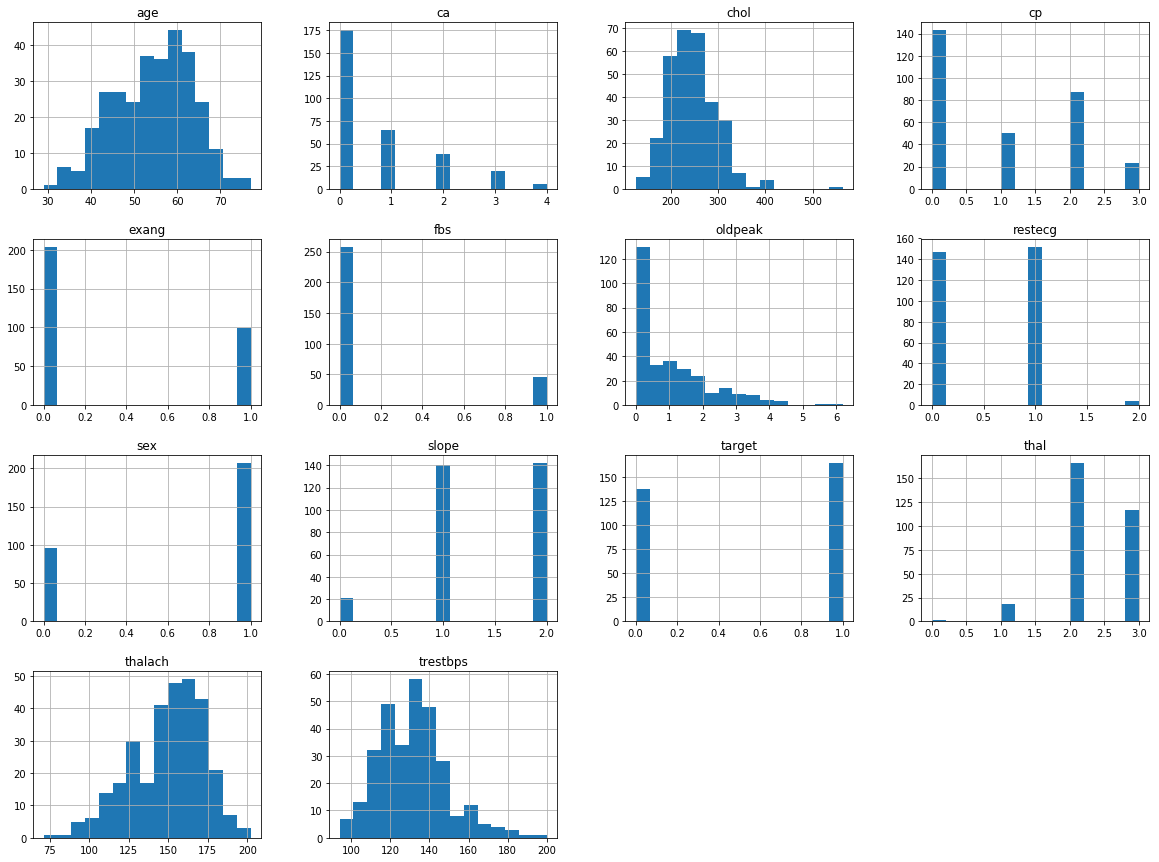

In [6]:
df_raw.hist(bins=15, figsize=(20,15))

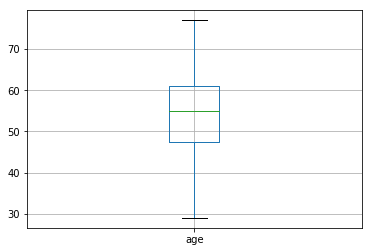

In [7]:
df_raw.boxplot(column=['age'])

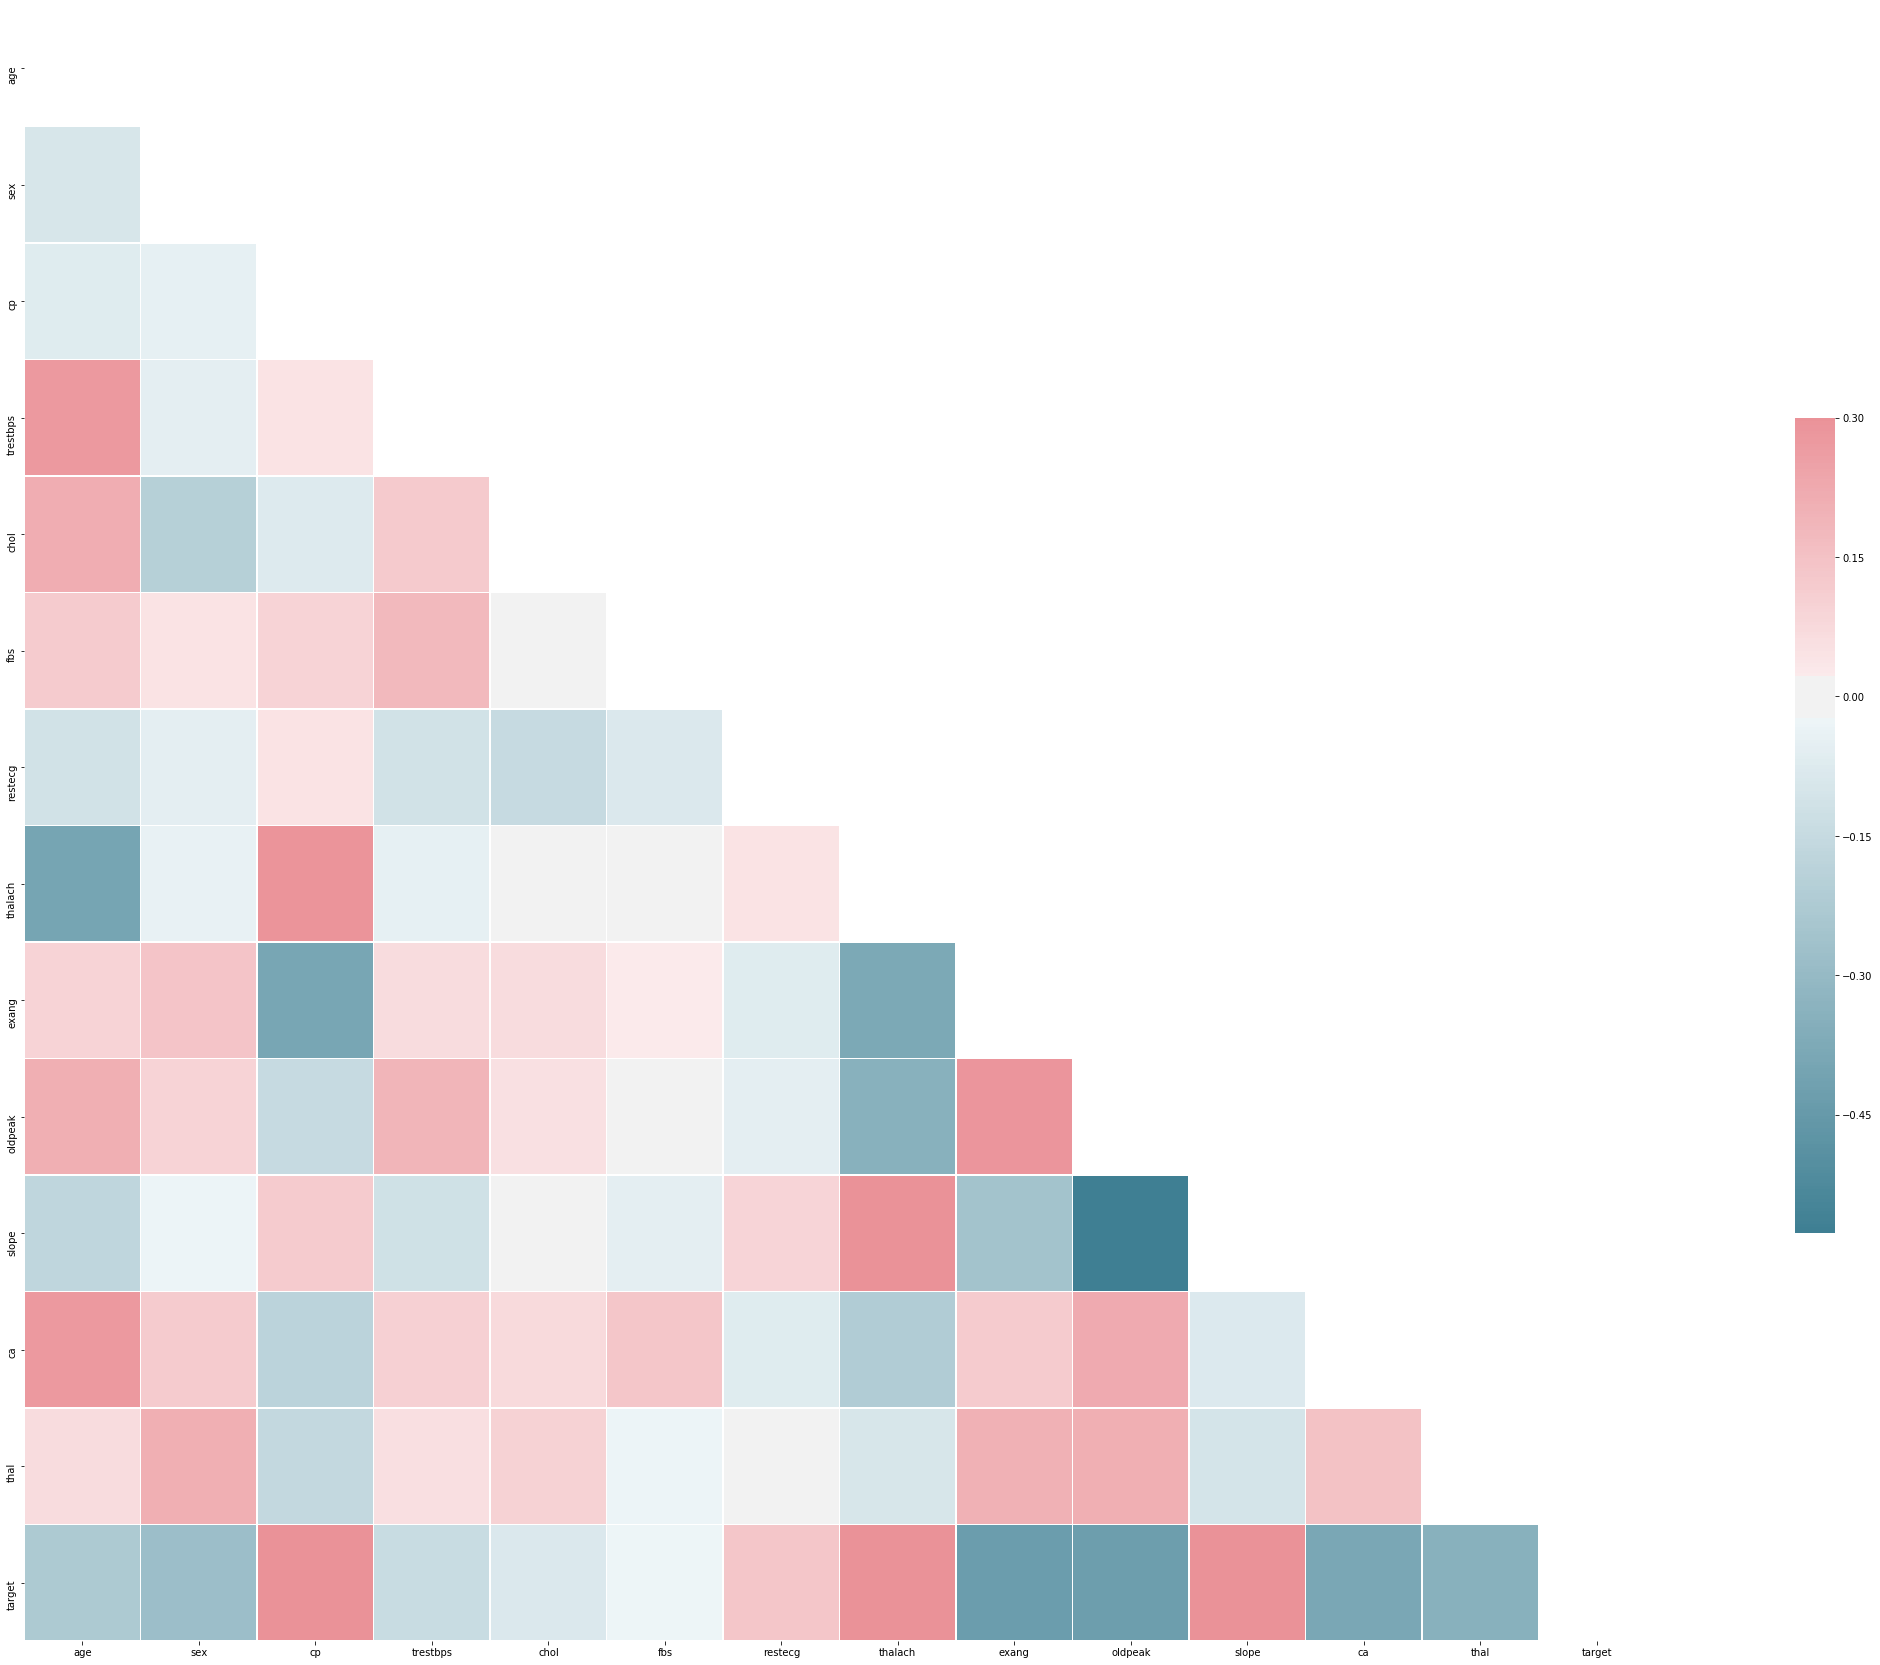

In [8]:
%matplotlib inline
corr = df_raw.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the figure and its dimensions
f, ax = plt.subplots(figsize=(50, 30))

# Generate a colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the correlation matrix with the colormap above
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

TypeError: __init__() got an unexpected keyword argument 'shrink'

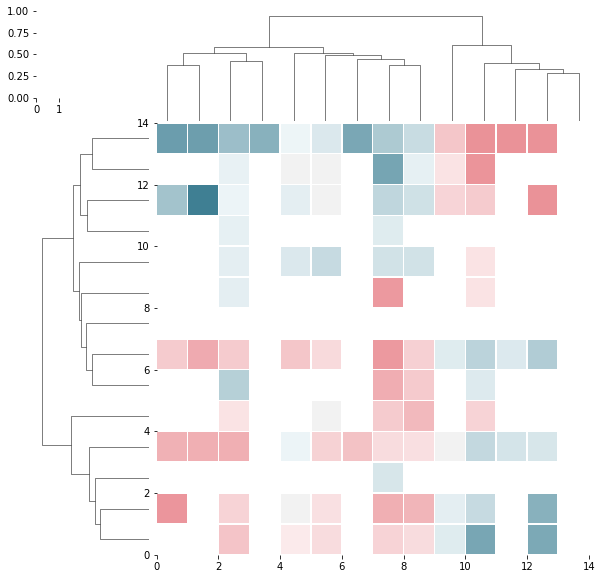

In [9]:
# Set up the figure and its dimensions
# f, ax = plt.subplots(figsize=(50, 30))
# Draw the correlation matrix with the colormap above
sns.clustermap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


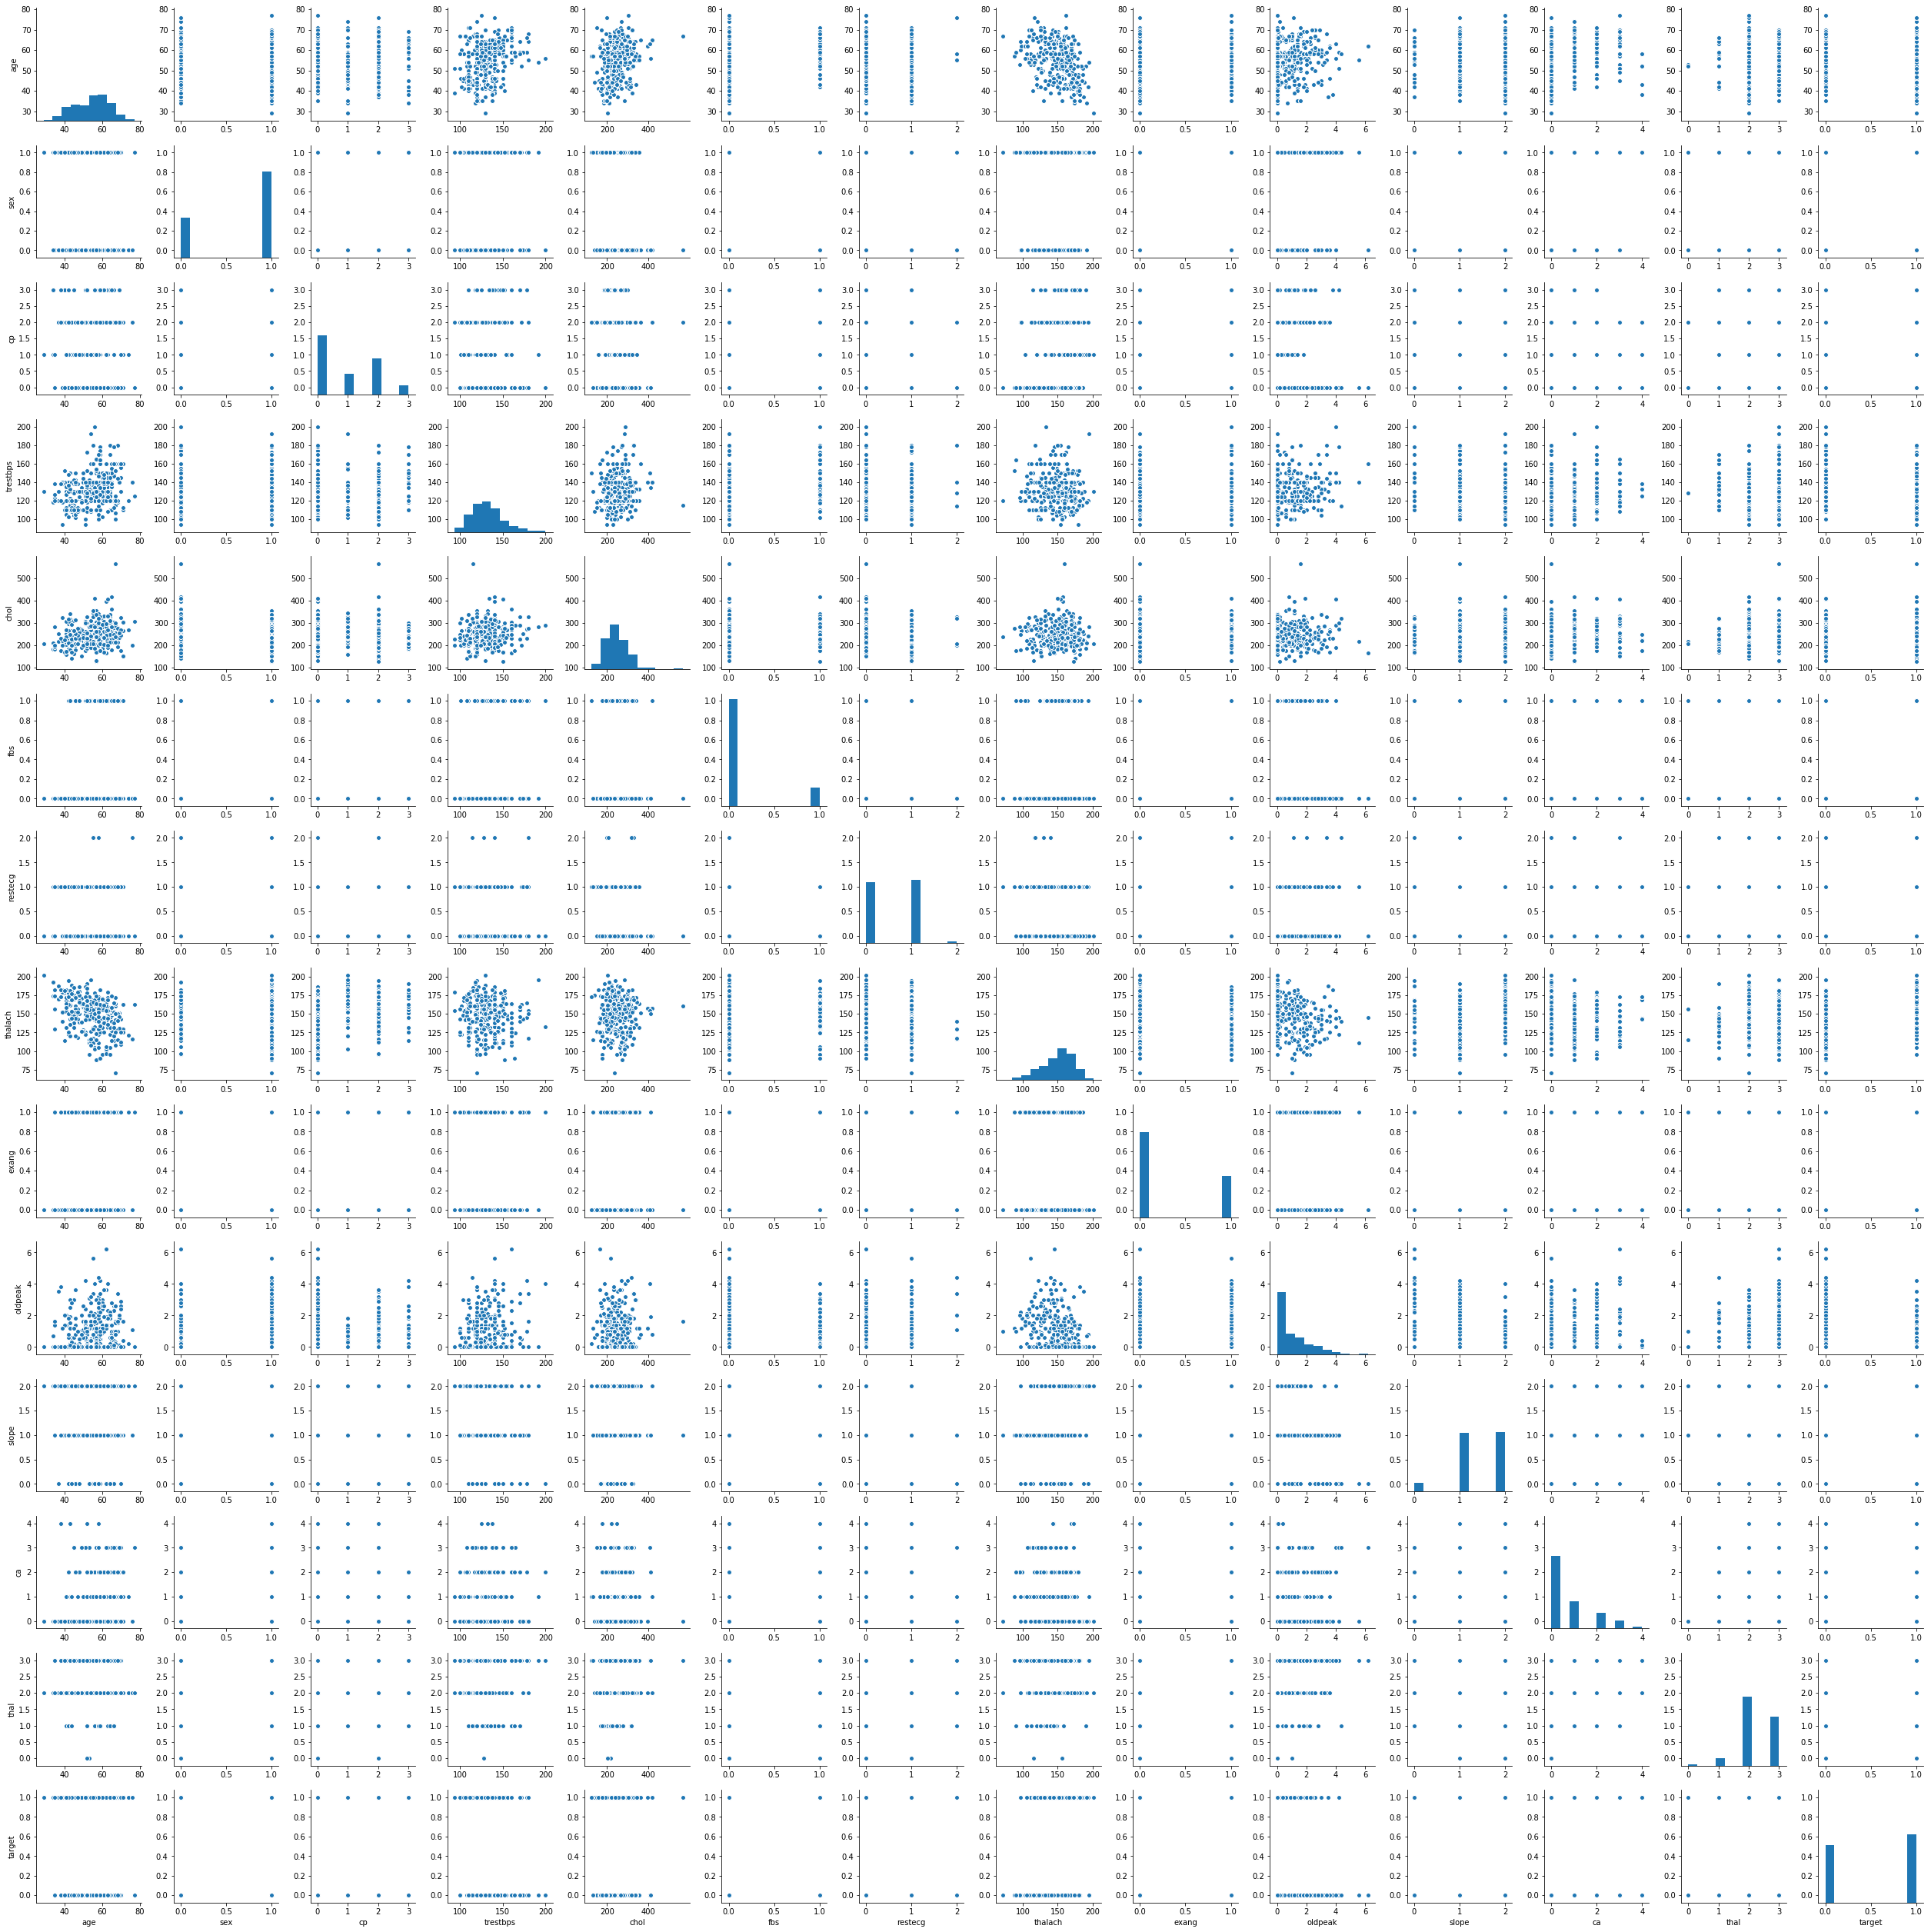

In [10]:
sns.pairplot(df_raw)

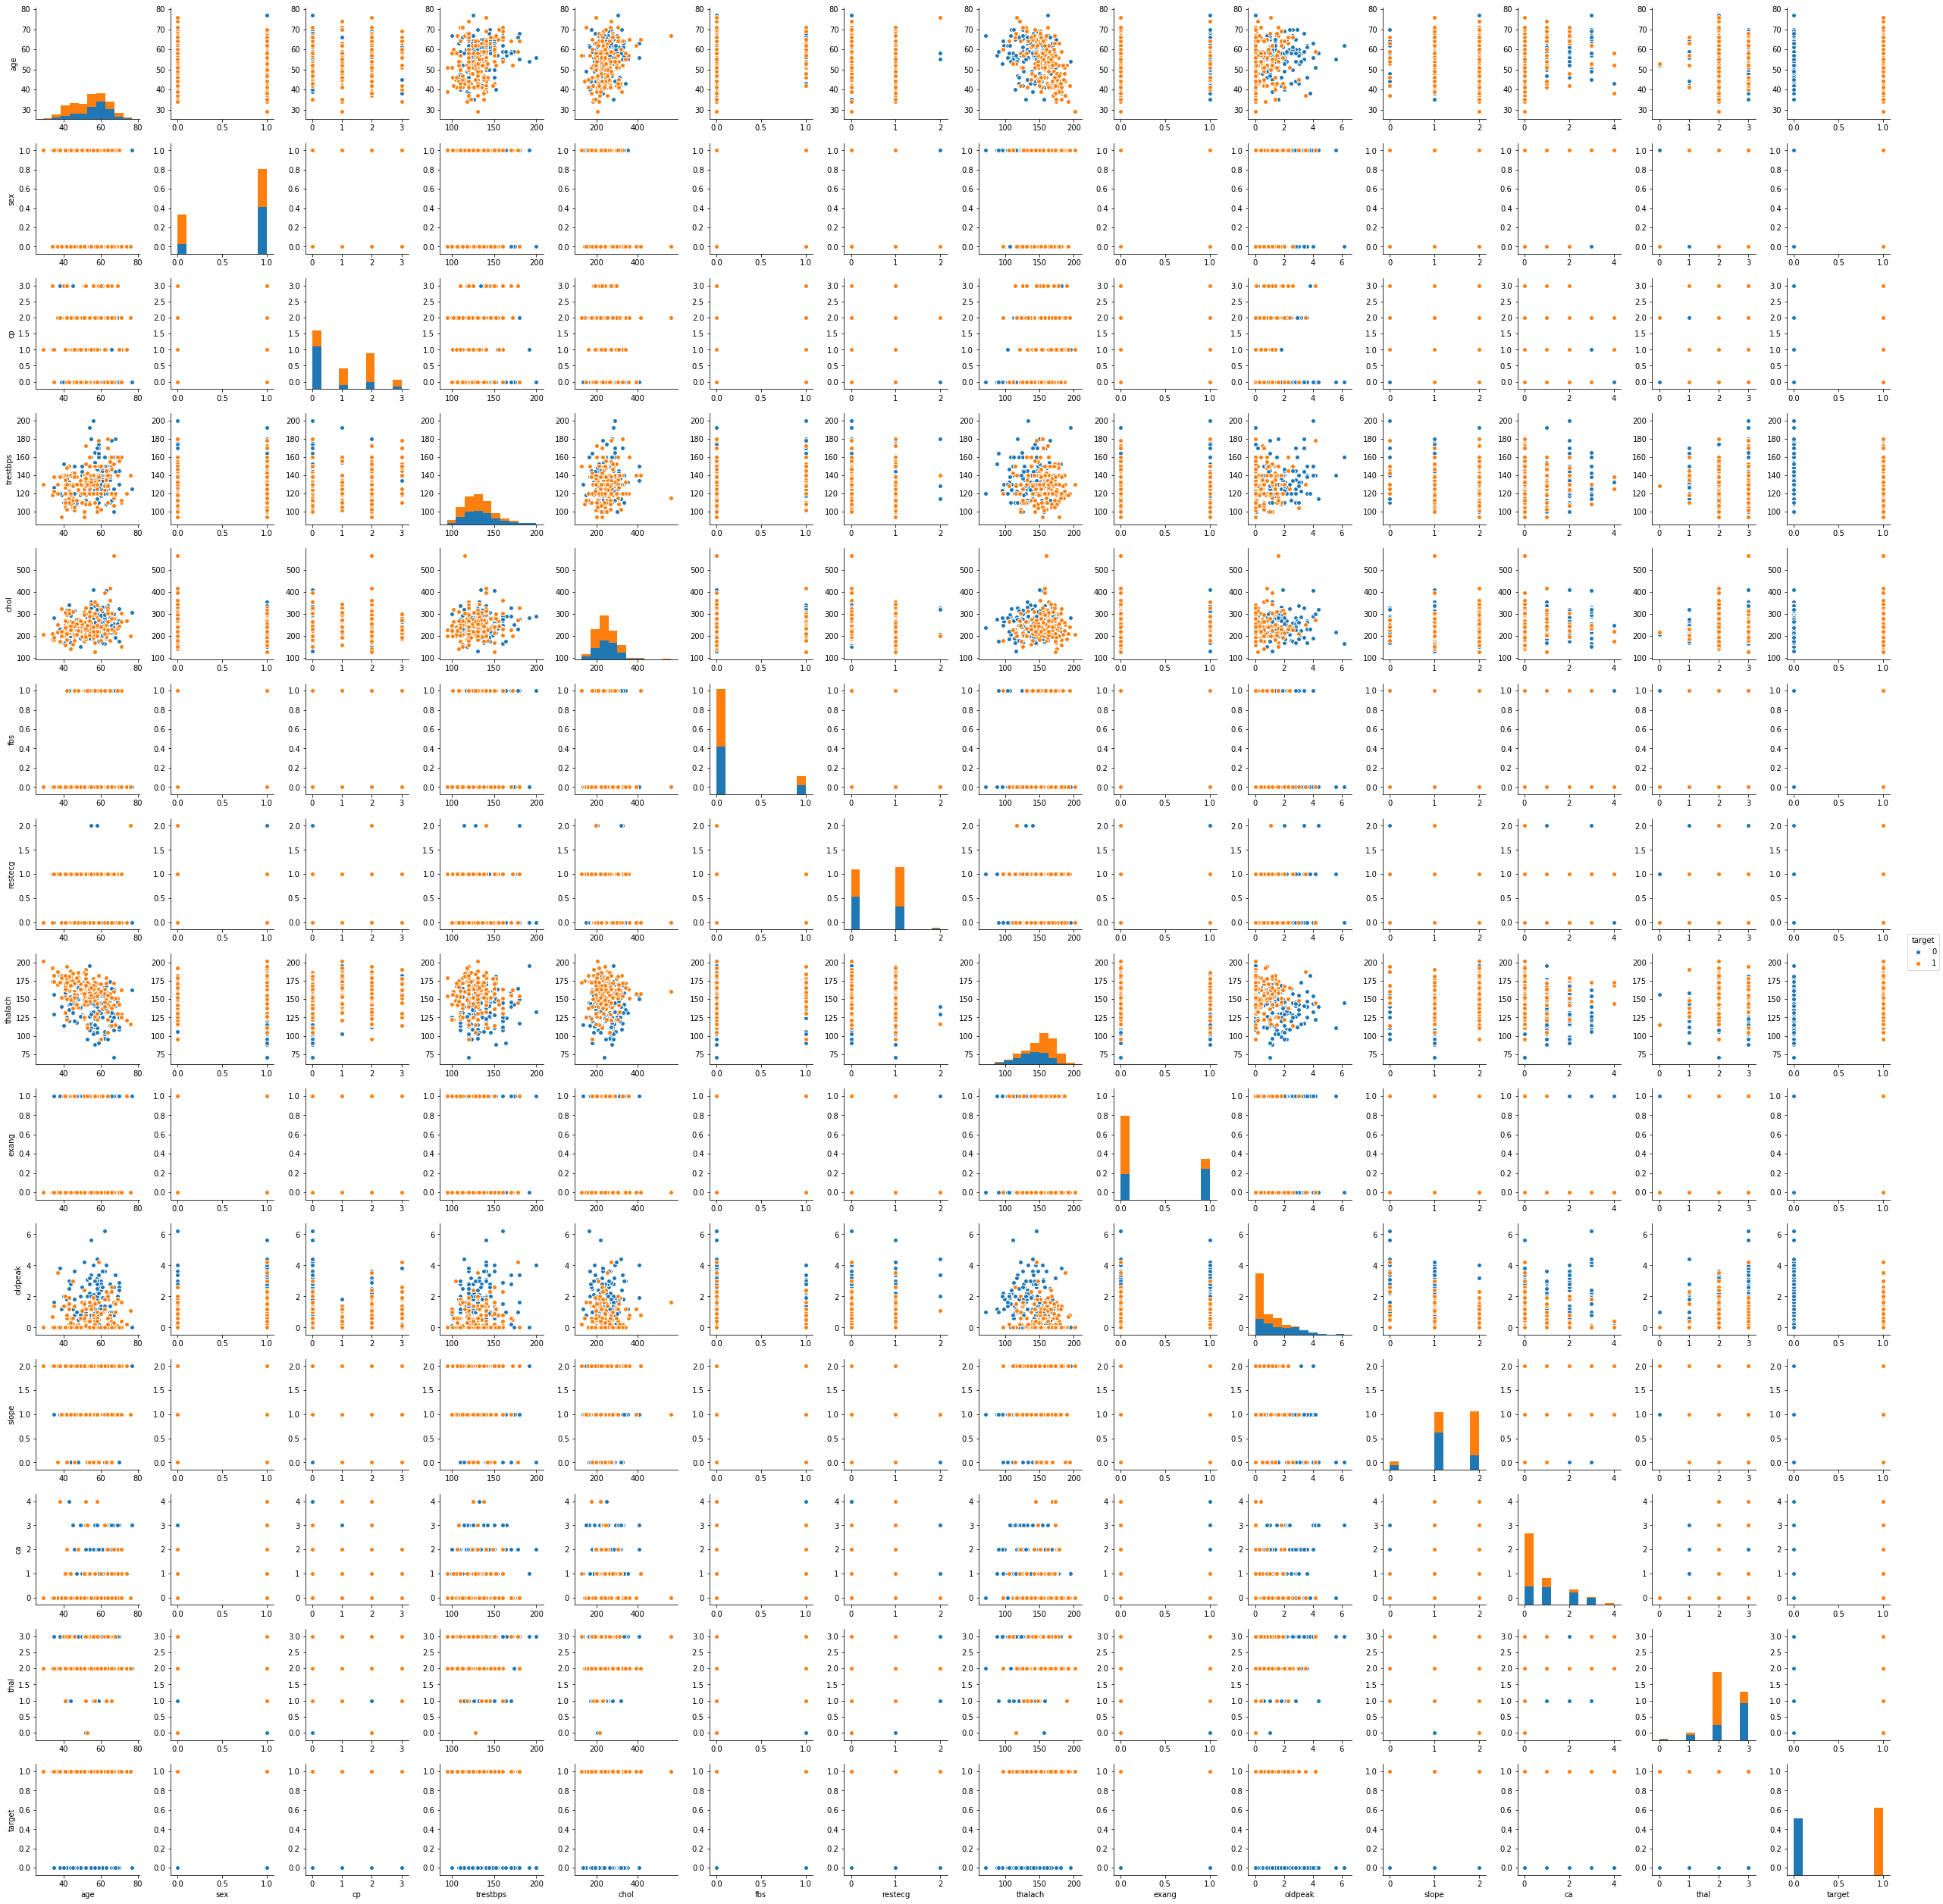

In [11]:
sns.pairplot(df_raw, hue='target')

# Predictive modelling
The predictive analysis follows a descriptive stage, once we have:
 - cleaned the data
 - created a few derived variables
 - have a better understanding of the data. 
 
Its aim is to build a performing predictive model and identify the main drivers. This is an iterative process as a variety of modelling approaches and features are tried and tested.

> **In general, modelling can be characterised into** 
> 1. **classification problem** (discrete target)
> 1. **regression problem** (continuous target)

> **Here, as the target is whether or not a patient will get heart disease, it is a CLASSIFICATION problem.**

### The Bias - Variance tradeoff

A good prediction model is evaluated against 3 main criteria - it must be:
1. Simple
2. Robust
3. Performant

If you make your model very complex, so that it fits the train data very accurately, it will not be able to model new data accurately - this is what we call **overfitting** (cf. image here below).
On the other hand, if it is too simple, it will not be able to model the data very accurately - this is what we call **underfitting** (cf. image here below).

![](images/overfitting.png)
Source: https://en.wikipedia.org/wiki/File:Overfitting.svg

We need to find a tradeoff between a model's complexity and its predicting performance. 
In the following image, we can see that the best tradeoff is where the arrow is pointing.


![](images/overfitting_v2.png)

Source: https://en.wikipedia.org/wiki/File:Overfitting_svg.svg

## You can't have it all

> If the algorithm we select is simple, explainable and interpretable, this may help the experts trust and leverage this tool a lot more. However I understand a complex algorithm may yield greater benefits and I would like to understand that tradeoff between complexity and benefit a bit better.

After that meeting you set out to do the following : 
* Build a collection of both simple and complex models to understand the trade-off between complexity and benefits
* Show diagrams of how the models work in a simplistic manner by exposing components of the model
* Generate feature importance for each model so that the main drivers can be better exposed and trusted

### Train / test split
Train / test split
A good prediction model must be generalisable - i.e., it should be able to make accurate predictions on new data. Several methods exists, to make our model more generalisable, of which the 'train/test split'.

* **Train Set**: The training set contains a known output and the model learns on this data in order to be generalized to other data later on
* **Test Set**: We have the test dataset (or subset) in order to test our model’s prediction on this subset.

Other methods, such as train/test/validation split and cross-validation take this approach one step further.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df_raw.drop('target', 1), 
                                                    df_raw['target'], 
                                                    test_size = .2, 
                                                    random_state=10)

### Build the Model - Random Forest

The random forest is a model **made up of many decision trees**. Rather than just simply averaging the prediction of trees (which we could call a “forest”), this model uses two key concepts that gives it the name random:

1. Random **sampling of training data points** when building trees
1. Random **subsets of features** considered when splitting nodes

###### Decision tree

A decision tree can be perceived as a set of rules which enable to better describe and predict a given phenomenon, e.g., here, the yes/no heart disease. As its name indicates, a tree is composed of branches (which link the nodes to one another or to the final leaves), nodes (in the middle of the tree) and leaves (higher end of the tree).

In our case, the tree splits at each node, on a **rule/condition** (explanatory variable and a set of values) according to a criterion (Gini), to better separate Low vs High populations.

The decision tree algorithm has several important hyperparameters (cf. advanced section to know more). Understanding these will enable you to avoir overfitting:

* the splitting criterion, for each node: Gini (most frequently used), entropy etc.
* the maximum depth of the tree: how many branches link the first node to the end leaves?
* the minimum sample split: the minimum number of data points in each node, after a split
* the minimum samples per leaf: the minimum number of data points in each final leaf
* the maximum number of features to consider when looking for the best split *(from the sklearn documentation)*:
    * If int, then consider max_features features at each split.
    * If float, then max_features is a percentage and int(max_features * n_features) features are considered at each split.
    * If “auto”, then max_features=sqrt(n_features).
    * If “sqrt”, then max_features=sqrt(n_features).
    * If “log2”, then max_features=log2(n_features).
    * If None, then max_features=n_features.

In [13]:
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [14]:
y_predict = model.predict(X_test)
y_pred_quant = model.predict_proba(X_test)[:, 1]
y_pred_bin = model.predict(X_test)

In [15]:
estimator = model.estimators_[1]
feature_names = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values

In [16]:
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

Image(filename = 'tree.png')

FileNotFoundError: [Errno 2] No such file or directory: 'dot': 'dot'

## Plot Feature Importance

The feature importances in a random forest indicate the sum of the reduction in Gini Impurity over all the nodes that are split on that feature. We can use these to try and figure out what predictor variables the random forest considers most important.

> **Gini Impurity**:
> The Gini Impurity represents the probability that a randomly selected sample from the node will be incorrectly classified according to the distribution of samples in the node. At the top, there is a 44.4% chance that a randomly selected point would be incorrectly classified. The Gini Impurity is how the decision tree makes splits. It splits the samples based on the value of a feature that reduces the Gini Impurity by the largest amount. If we do the math, the average (weighted by number of samples) Gini Impurity decreases as we move down the tree.

> Eventually, the average Gini Impurity goes to 0.0 as we correctly classify each point. However, correctly classifying every single training point is usually not a good indicator because that means the model will not be able to generalize to the testing data! This model correclty classifies every single training point because we did not limit the maximum depth and during training, we give the model the answers as well as the features.

In [ ]:
features_log = pd.DataFrame(model.feature_importances_, index = X_train.columns.tolist(), 
                            columns = ['Importance'])
features_log = features_log.sort_values(by='Importance', ascending=True)

features_log.plot(kind='barh', figsize=(12,9), color = 'blue')
plt.xlabel('Feature importance')
plt.title('Feature importance for the logistic regression model')
plt.show()

### The confusion Matrix

> Don't let the name confuse you!

* The confusion matrix enables to have an overview of the performance of a classification predictive model, as it indicates the number of events which were predicted correctly - either the 'LOW' or 'HIGH' concentrations (i.e., 'true positives' and 'true negatives') - and the number of events which were not predicted accurately (i.e., 'false positives' and 'false negatives').



![](images/confusion_matrix_v2.png)
Source: McKinsey

* **NB**: TP = True Positives, FP = False Positives, FN = False Negatives, FP = False Positives

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Plot the confusion matrix of the logistic regression
rf_cfn = confusion_matrix(y_test, y_pred_bin)
rf_tp, rf_fp, rf_fn, rf_tn = confusion_matrix(y_test, y_pred_bin).ravel()
# plot_confusion_matrix(logit_cfn, classes = ['Low', 'High'])

class_names = ['no disease', 'disease']

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(rf_cfn, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(rf_cfn, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

> How good are our models? 

###### It depends\*... what metric we are looking at!

\*this verb will often be used in machine learning, as there are many tradeoffs, depending on the business needs.

### ROC Curve

Another common metric is the Area Under the Curve, or AUC. This is a convenient way to capture the performance of a model in a single number, although it's not without certain issues. As a rule of thumb, an AUC can be classed as follows,

* 0.90 - 1.00 = **excellent**
* 0.80 - 0.90 = **good**
* 0.70 - 0.80 = **fair**
* 0.60 - 0.70 = **poor**
* 0.50 - 0.60 = **fail**

Let's see what the above ROC gives us,

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for heart disease classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [ ]:
auc(fpr, tpr)